# Agriculture Producer Profile: Access to Credit Gender Gap

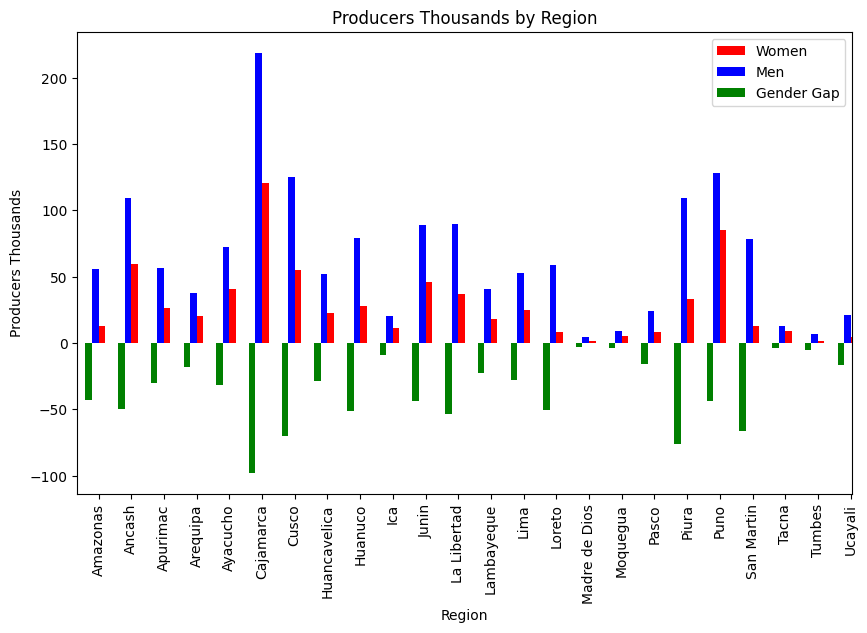

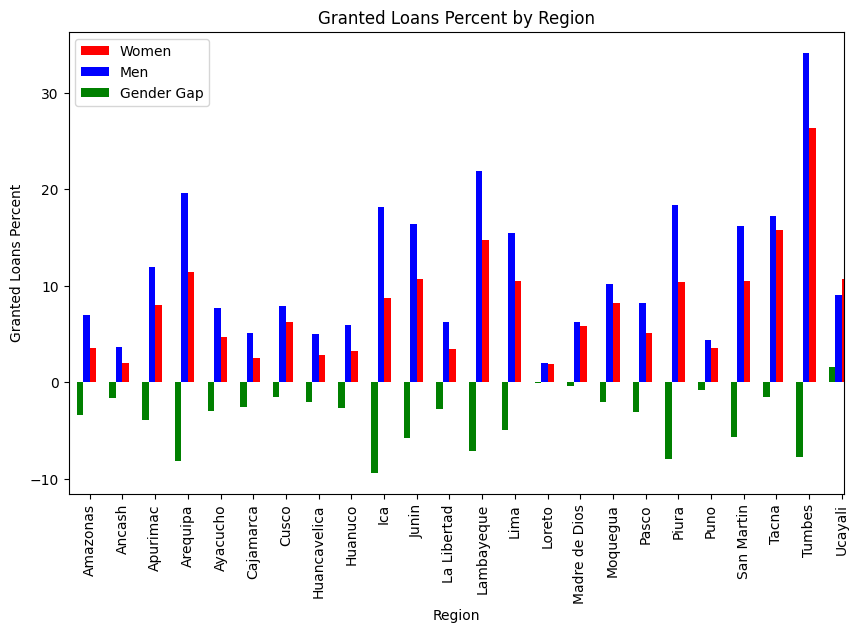

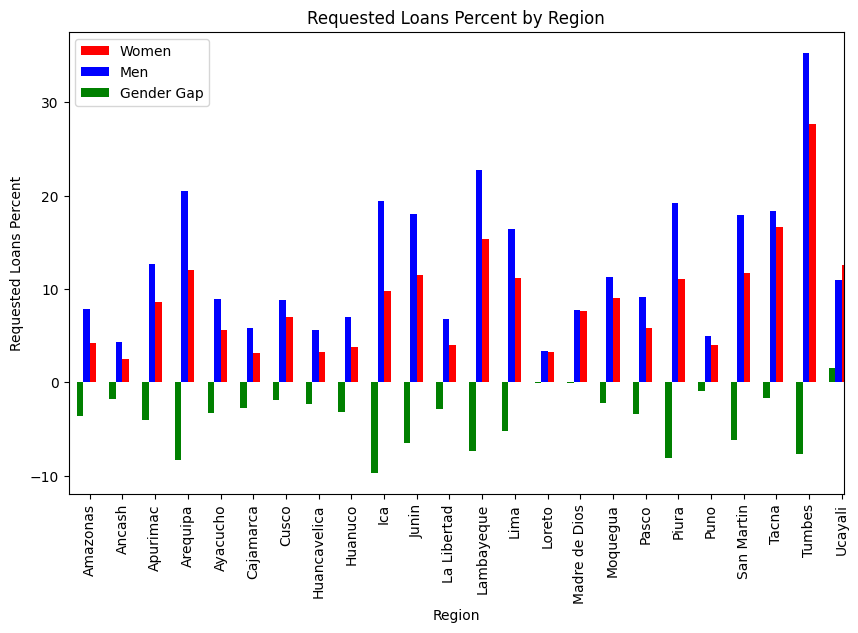

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'C:\Users\jcbur\OneDrive - peruvianbusinesscouncil.com\csv files\#11_python_final_assignment\#3_bottomline_csv_ datasets\producer_profile_gender_gap_2012.csv')

# Filter out 'Callao' and 'Nacional' from the 'region' column
df_filtered = df[~df['region'].isin(['Callao', 'Nacional'])]

# Define categories for visualization
categories = ['producers_thousands', 'granted_loans_percent', 'requested_loans_percent']

# Initialize a dictionary to store the data
data = {}

# Calculate the values for women, men, and the gender gap for each category
for category in categories:
    # Group by region and gender and calculate the sum for each category
    gender_sum = df_filtered.groupby(['region', 'gender'])[category].sum().unstack()
    
    # Store the values for women and men
    data[f'{category}_women'] = gender_sum['women']
    data[f'{category}_men'] = gender_sum['men']
    
    # Calculate and store the gender gap (women - men)
    data[f'{category}_gender_gap'] = gender_sum['women'] - gender_sum['men']

# Convert the data dictionary to a DataFrame for better visualization
data_df = pd.DataFrame(data)

# Create visualizations for each category
for category in categories:
    # Create a figure and a set of subplots
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot women's data
    data_df[f'{category}_women'].plot(kind='bar', ax=ax, color='red', position=0, label='Women', width=0.2)
    
    # Plot men's data
    data_df[f'{category}_men'].plot(kind='bar', ax=ax, color='blue', position=1, label='Men', width=0.2)
    
    # Plot gender gap data
    data_df[f'{category}_gender_gap'].plot(kind='bar', ax=ax, color='green', position=2, label='Gender Gap', width=0.2)
    
    # Set the title and labels
    ax.set_title(f'{category.title().replace("_", " ")} by Region')
    ax.set_xlabel('Region')
    ax.set_ylabel(category.title().replace("_", " "))
    
    # Add legend
    ax.legend()

    # Show the plot
    plt.show()
